In [1]:
import os
import matplotlib.pyplot as plt
import pathlib
import shutil
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
def change_folder_names(file_path): 
    test = []
    for root,dirs,files in os.walk(file_path):
        for dir_name in dirs:
            os.rename(os.path.join(root, dir_name), os.path.join(root, dir_name.lower().replace("_", "")))


In [3]:
train_path_1 = "./data/train"
validation_path_1 = "./data/validation"
test_path_1 = "./data/test"

train_path_2 = "./data2/train"
validation_path_2 = "./data2/validation"
test_path_2 = "./data2/test"

train_path = "./final_data/train"
validation_path = "./final_data/validation"
test_path = "./final_data/test"

f_path = './final_data'

change_folder_names(train_path_1)
change_folder_names(validation_path_1)
change_folder_names(test_path_1)
change_folder_names(train_path_2)
change_folder_names(validation_path_2)
change_folder_names(test_path_2)

In [4]:
def make_new_file_tree(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [5]:
def move_files(d_set, content):
    folder_types = ['test', 'train', 'validation']

    target_path = "./final_data"

    make_new_file_tree(f'./{target_path}')

    for category in content:
        print(f'{d_set} Catergory: {category}')
        make_new_file_tree(f'{target_path}/{category}')
        for f_type in folder_types:
            for root,dirs,files in os.walk(f'./{d_set}/{f_type}/{category}'): 
                for file in files:
                    file_path = f'./{d_set}/{f_type}/{category}/{file}'
                    shutil.copyfile(file_path, target_path + f'/{category}/{file}')

In [6]:
d1_content = os.listdir(train_path_1)
d2_content = os.listdir(train_path_2)

content = list(dict.fromkeys(d1_content + d2_content))

move_files('data', content)
move_files('data2', content)                      

data Catergory: bottlegourd
data Catergory: capsicum
data Catergory: radish
data Catergory: pumpkin
data Catergory: bittergourd
data Catergory: cauliflower
data Catergory: potato
data Catergory: bean
data Catergory: cucumber
data Catergory: brinjal
data Catergory: cabbage
data Catergory: broccoli
data Catergory: papaya
data Catergory: tomato
data Catergory: carrot
data Catergory: apple
data Catergory: turnip
data Catergory: chilli pepper
data Catergory: raddish
data Catergory: bell pepper
data Catergory: pear
data Catergory: sweetpotato
data Catergory: pomegranate
data Catergory: peas
data Catergory: spinach
data Catergory: lettuce
data Catergory: kiwi
data Catergory: lemon
data Catergory: onion
data Catergory: jalepeno
data Catergory: sweetcorn
data Catergory: paprika
data Catergory: watermelon
data Catergory: mango
data Catergory: grapes
data Catergory: beetroot
data Catergory: eggplant
data Catergory: corn
data Catergory: soy beans
data Catergory: banana
data Catergory: ginger
data 

In [7]:
data_dir = pathlib.Path(f_path)

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24144 files belonging to 44 classes.
Using 19316 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24144 files belonging to 44 classes.
Using 4828 files for validation.


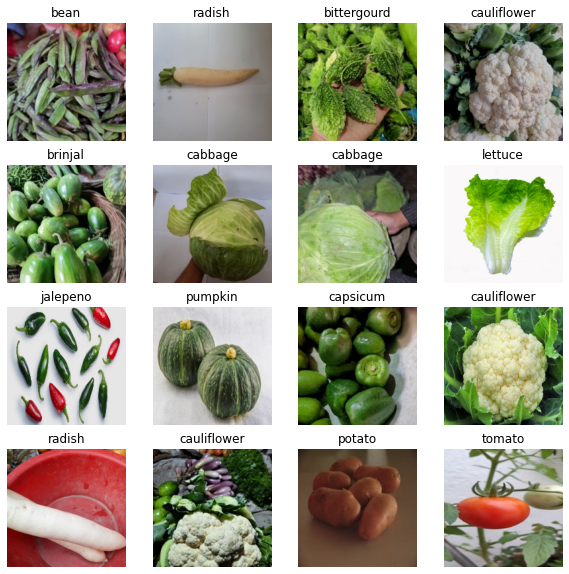

In [11]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [13]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [16]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)


Epoch 1/15
135/604 [=====>........................] - ETA: 3:35 - loss: 2.4537 - accuracy: 0.3292

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()